### Analysis and Forecast on Weekly Basis

Done according to: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#prerequisites

In [111]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [112]:
file1 = 'US Coffee C Futures Historical Data.csv'
table1 = pd.read_csv(file1)

file2 = 'US Coffee C Futures Historical Data2.csv'
table2 = pd.read_csv(file2)

file3 = 'US Coffee C Futures Historical Data3.csv'
table3 = pd.read_csv(file3)

data_frames = [table1, table2, table3]
df_init = pd.concat(data_frames)
df_init = df_init.drop_duplicates()
df_init.tail()

,Date,Price,Open,High,Low,Vol.,Change %
34,"Aug 09, 2000",79.50,82.90,83.50,79.3,8.56K,-5.02%
35,"Aug 08, 2000",83.70,85.50,86.00,83.4,4.50K,-1.99%
36,"Aug 07, 2000",85.40,85.50,86.00,84.8,2.53K,-0.23%
37,"Aug 04, 2000",85.60,85.85,86.25,85.0,2.52K,-0.29%
38,"Aug 03, 2000",85.85,86.50,87.50,85.0,2.66K,-0.69%


In [113]:
df_init['Date'] = df_init['Date'].astype(str)
df_init['Date'] = pd.to_datetime(df_init['Date'])
df = df_init.set_index(['Date'])
df.sort_index(inplace=True)
df = df.loc[:, ['Price']]
df = df.asfreq('D')
df = df.resample('D').interpolate()[::7]
df.head()

,Price
Date,
1980-08-26,130.75
1980-09-02,125.57
1980-09-09,136.35
1980-09-16,128.87
1980-09-23,131.36


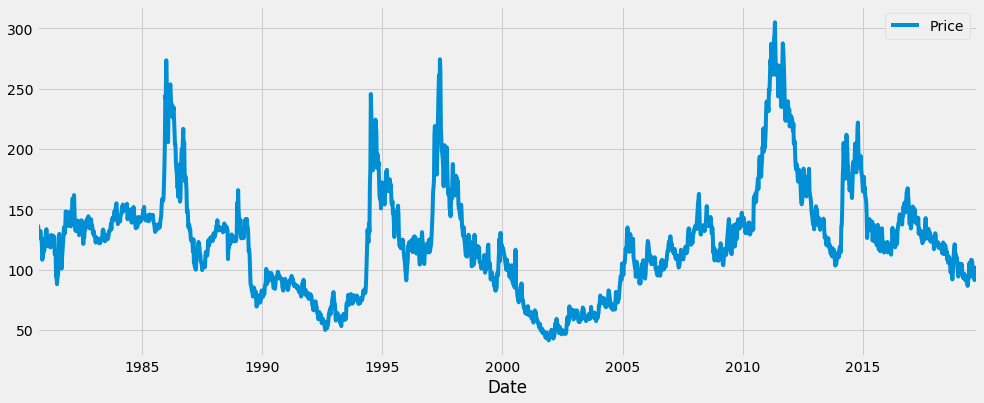

In [114]:
df.plot(figsize=(15, 6))
plt.show()

In [115]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [116]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:25673.189769824014
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:23096.58246587528
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:18386.139744889882
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:18287.014412166543
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:18379.75406279048
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:18370.350382107965
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:18295.666822096602
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:18272.00739646856
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:22965.795970928884
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20649.336238351356
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16666.65616352962
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16556.403466233074
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16662.675511234735
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16631.720300627036
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16576.070582255215
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16472.645536354823
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:13627.126821392561
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:13550.247280420

Lowest AIC:
ARIMA(1,  0, 1)x(0, 1, 1,  12)12 - AIC:			13518.6687448754

In [117]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9882      0.002    434.273      0.000       0.984       0.993
ma.L1          0.0012      0.014      0.086      0.931      -0.027       0.029
ma.S.L12      -1.0077      0.010    -97.508      0.000      -1.028      -0.987
sigma2        46.2841      0.924     50.076      0.000      44.472      48.096


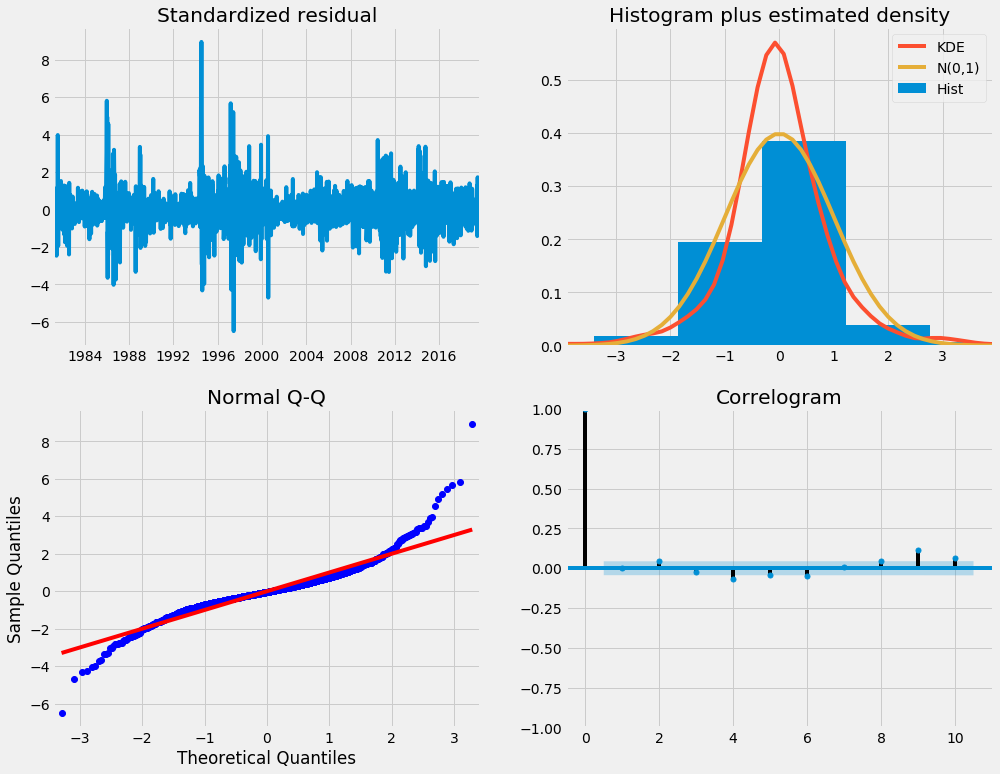

In [118]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [79]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

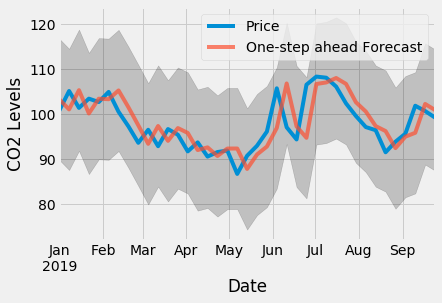

In [80]:
ax = df['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [119]:
df_forecasted = pred.predicted_mean
frame = {'Date': df_forecasted.index, 'Price': df_forecasted.values}
df_forecasted = pd.DataFrame(frame)
df_forecasted = df_forecasted.set_index(['Date'])

df_truth = df['2019-01-01':]


# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Price    16.92
dtype: float64


a better representation of our true predictive power can be obtained using dynamic forecasts. In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In the code chunk below, we specify to start computing the dynamic forecasts and confidence intervals from January 1998 onwards.

In [126]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-01-02'),end=pd.to_datetime('2018-01-16'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

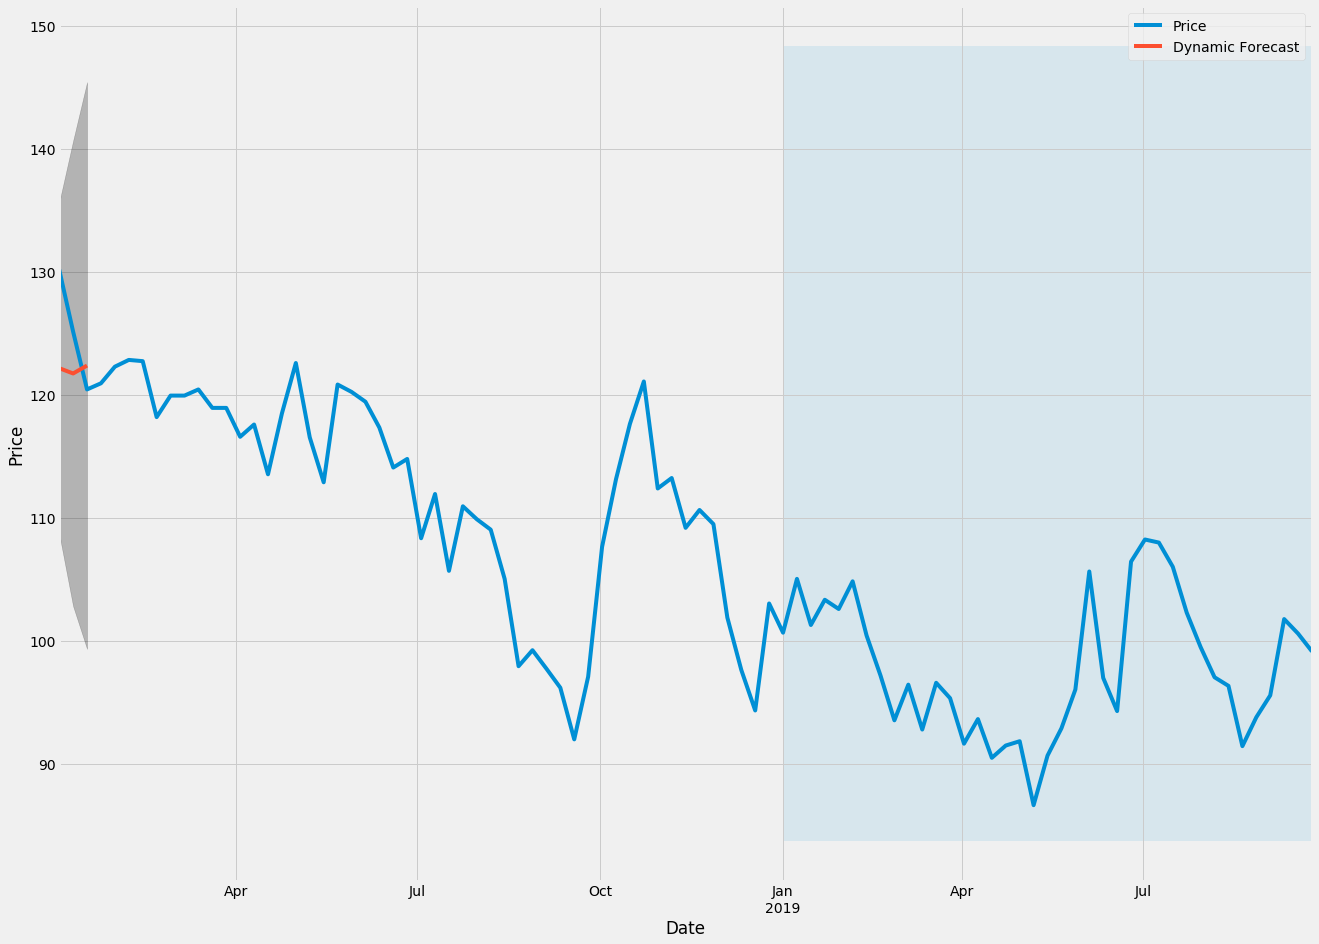

In [127]:
ax = df['2018':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), df.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [128]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
frame = {'Date': df_forecasted.index, 'Price': df_forecasted.values}
df_forecasted = pd.DataFrame(frame)
df_forecasted = df_forecasted.set_index(['Date'])
df_truth = df['2019-01-01':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Price   NaN
dtype: float64


### Producing and Visualizing Forecasts

In [102]:
# Get forecast 12 steps ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

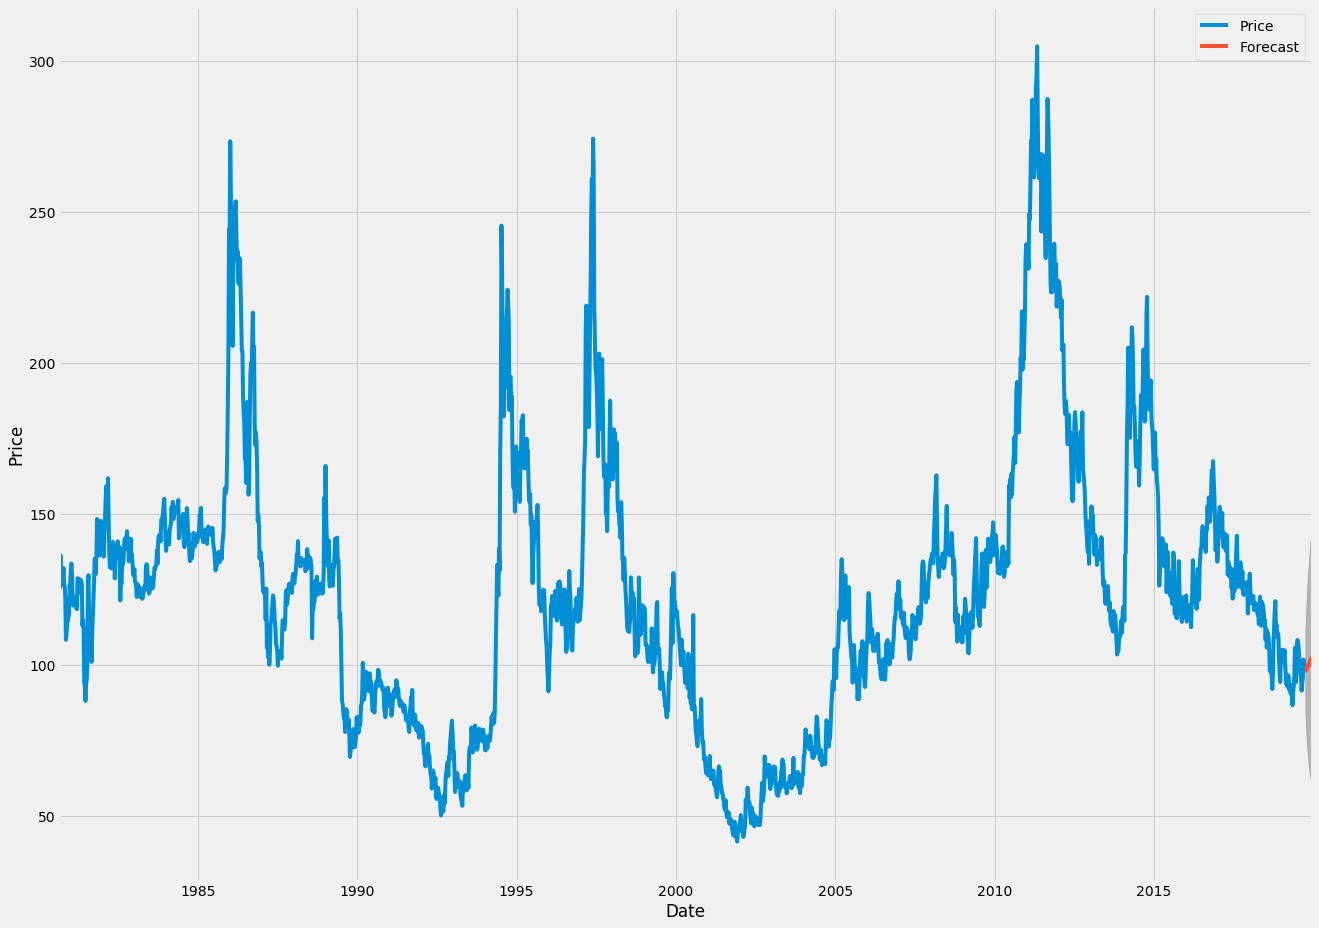

In [104]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [109]:
print(pred_uc.prediction_results)

In [110]:
results.forecast(steps=12)

2019-10-01     97.962185
2019-10-08     97.996757
2019-10-15     98.655554
2019-10-22     98.934326
2019-10-29     99.902864
2019-11-05    100.076580
2019-11-12     99.802323
2019-11-19    100.647537
2019-11-26    101.690644
2019-12-03    101.867278
2019-12-10    102.238510
2019-12-17    102.431907
Freq: 7D, dtype: float64